In [29]:
import os
import biom
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skbio.stats.distance import mantel
from skbio import DistanceMatrix

In [2]:
# Author: Sherlyn_Weng
# Last Updated: 2025-10-13

In [21]:
def load_tsv(path):
    df = pd.read_csv(path, sep='\t', low_memory=False, index_col=0)
    return df

In [22]:
def load_biom(path):
    df = biom.load_table(path).to_dataframe()
    return df

## unweighted unifrac

In [81]:
base = "/ddn_scratch/yac027/03_Bowtie2Benchmark/analyses/beta_div/unweighted_unifrac/Test1"

In [82]:
# pdirs = [
#     "01_k16_no-split", "02_a_no-split", "03_igor_no-split",
#     "04_k16_split4", "04a_k16_split4a", "05_a_split4",
#     "05a_a_split4a", "06_igor_split4", "06a_igor_split4a",
#     "07_k16_split10", "08_a_split10", "09_igor_split10"
# ]

In [83]:
pdirs = [d for d in os.listdir(base) if os.path.isdir(os.path.join(base, d))]
pdirs = sorted(pdirs)

In [84]:
results = []

# Pairwise comparisons
for p1, p2 in itertools.combinations(pdirs, 2):
    f1 = os.path.join(base, p1, "species_collapsed_gOTU_unweighted_unifrac.tsv")
    f2 = os.path.join(base, p2, "species_collapsed_gOTU_unweighted_unifrac.tsv")
    
    if not (os.path.exists(f1) and os.path.exists(f2)):
        continue
    
    wuf1 = load_tsv(f1)
    wuf2 = load_tsv(f2)
    
    if wuf1.shape != wuf2.shape:
        continue  # skip incompatible
    
    # Mantel test (need DistanceMatrix)
    dm1 = DistanceMatrix(wuf1.values, ids=wuf1.index)
    dm2 = DistanceMatrix(wuf2.values, ids=wuf2.index)
    
    corr, pval, _ = mantel(dm1, dm2, method='spearman', permutations=999)
    results.append([p1, p2, corr, pval])

# Put into DataFrame
df = pd.DataFrame(results, columns=["pdir1", "pdir2", "Mantel_r", "p_value"])
df.to_csv("mantel_results_unweighted_unifrac.tsv", sep="\t", index=False)

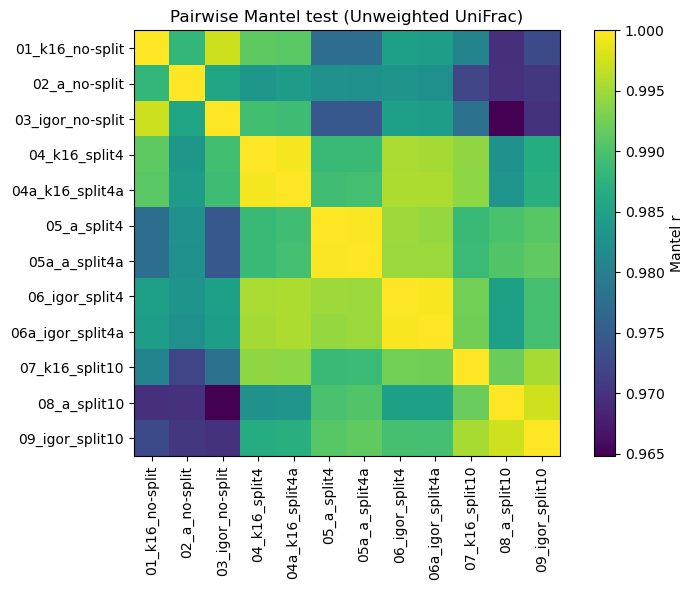

In [85]:
heatmap_df = pd.DataFrame(np.nan, index=pdirs, columns=pdirs)
for _, row in df.iterrows():
    heatmap_df.loc[row["pdir1"], row["pdir2"]] = row["Mantel_r"]
    heatmap_df.loc[row["pdir2"], row["pdir1"]] = row["Mantel_r"]
np.fill_diagonal(heatmap_df.values, 1.0)

# Get min and max Mantel r values (ignoring NaNs)
vmin = np.nanmin(heatmap_df.values)
vmax = np.nanmax(heatmap_df.values)

# Plot heatmap
plt.figure(figsize=(8, 6))
im = plt.imshow(heatmap_df, cmap="viridis", vmin=vmin, vmax=vmax)
plt.colorbar(im, label="Mantel r")
plt.xticks(range(len(pdirs)), pdirs, rotation=90)
plt.yticks(range(len(pdirs)), pdirs)
plt.title("Pairwise Mantel test (Unweighted UniFrac)")
plt.tight_layout()
plt.savefig("mantel_heatmap_unweighted_unifrac.png", dpi=300)
plt.show()

## weighted unifrac

In [86]:
base = "/ddn_scratch/yac027/03_Bowtie2Benchmark/analyses/beta_div/weighted_unifrac/Test1"

In [87]:
pdirs = [d for d in os.listdir(base) if os.path.isdir(os.path.join(base, d))]
pdirs = sorted(pdirs)

In [88]:
results = []

# Pairwise comparisons
for p1, p2 in itertools.combinations(pdirs, 2):
    f1 = os.path.join(base, p1, "species_collapsed_gOTU_weighted_unifrac.tsv")
    f2 = os.path.join(base, p2, "species_collapsed_gOTU_weighted_unifrac.tsv")
    
    if not (os.path.exists(f1) and os.path.exists(f2)):
        continue
    
    wuf1 = load_tsv(f1)
    wuf2 = load_tsv(f2)
    
    if wuf1.shape != wuf2.shape:
        continue  # skip incompatible
    
    # Mantel test (need DistanceMatrix)
    dm1 = DistanceMatrix(wuf1.values, ids=wuf1.index)
    dm2 = DistanceMatrix(wuf2.values, ids=wuf2.index)
    
    corr, pval, _ = mantel(dm1, dm2, method='spearman', permutations=999)
    results.append([p1, p2, corr, pval])

# Put into DataFrame
df = pd.DataFrame(results, columns=["pdir1", "pdir2", "Mantel_r", "p_value"])
df.to_csv("mantel_results_weighted_unifrac.tsv", sep="\t", index=False)

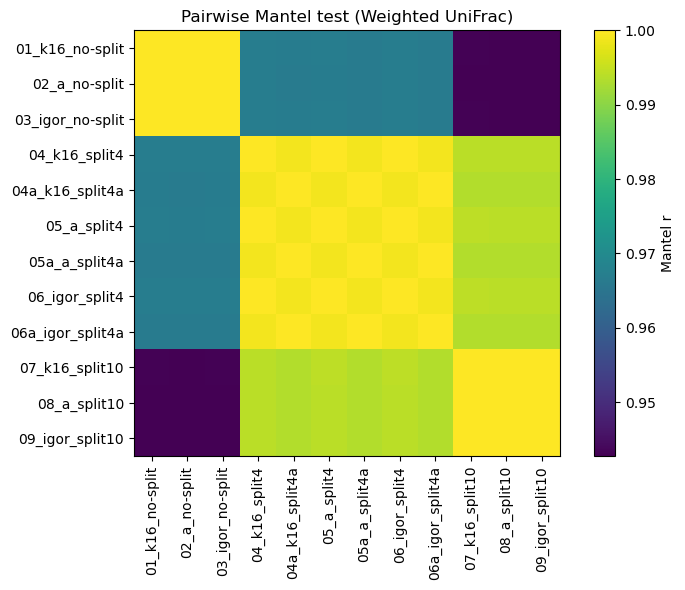

In [89]:
heatmap_df = pd.DataFrame(np.nan, index=pdirs, columns=pdirs)
for _, row in df.iterrows():
    heatmap_df.loc[row["pdir1"], row["pdir2"]] = row["Mantel_r"]
    heatmap_df.loc[row["pdir2"], row["pdir1"]] = row["Mantel_r"]
np.fill_diagonal(heatmap_df.values, 1.0)

# Get min and max Mantel r values (ignoring NaNs)
vmin = np.nanmin(heatmap_df.values)
vmax = np.nanmax(heatmap_df.values)

# Plot heatmap
plt.figure(figsize=(8, 6))
im = plt.imshow(heatmap_df, cmap="viridis", vmin=vmin, vmax=vmax)
plt.colorbar(im, label="Mantel r")
plt.xticks(range(len(pdirs)), pdirs, rotation=90)
plt.yticks(range(len(pdirs)), pdirs)
plt.title("Pairwise Mantel test (Weighted UniFrac)")
plt.tight_layout()
plt.savefig("mantel_heatmap_weighted_unifrac.png", dpi=300)
plt.show()